Unaltered Image


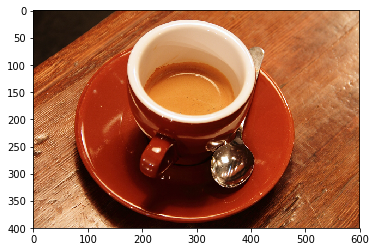

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import colors
from skimage import data,filters
from skimage.viewer import ImageViewer

#Unaltered Image
img = data.coffee()
plt.imshow(img)
print("Unaltered Image")
plt.show()

Color Tinting


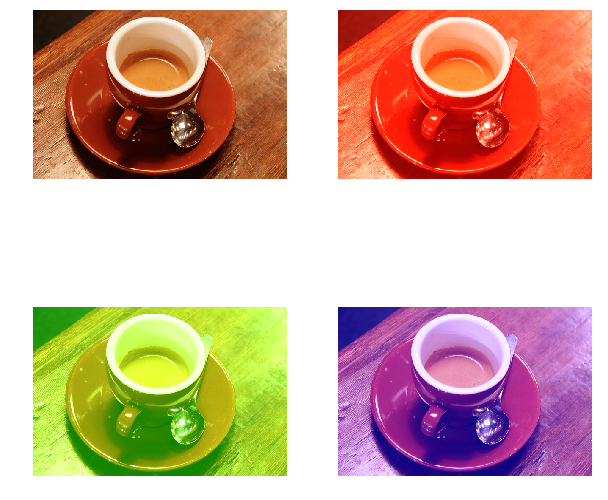

In [14]:
def tintedImage(img, color):
    newImage = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            temp = (np.uint16(img[i,j])+color).clip(0,255)
            newImage[i,j] = np.uint8(temp)
    return newImage

weight = 128
colors = np.array([(0,0,0),(weight,0,0),(0,weight,0),(0,0,weight)])
img = data.coffee()
fig, ax = plt.subplots(2,2,figsize=(10,10))
print("Color Tinting")
for i in range(4):
    axIndex = (i//2,i%2)
    ax[axIndex].imshow(tintedImage(img,colors[i]))
    ax[axIndex].axis("off")   
    ax[axIndex].axis("tight")  
    ax[axIndex].axis("image")  

In [2]:
def filteredImage(img,blurFilter):
    newImage = np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            color = (0,0,0)
            for rOffset in range(blurFilter.shape[0]):
                for cOffset in range(blurFilter.shape[1]):
                    r = (i+rOffset-blurFilter.shape[0]//2+img.shape[0])%img.shape[0]
                    c = (j+cOffset-blurFilter.shape[1]//2+img.shape[1])%img.shape[1]
                    color += img[r,c]*blurFilter[rOffset,cOffset]
            newImage[i,j] = np.uint8(color.clip(0,255))

    return newImage

Filter:
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


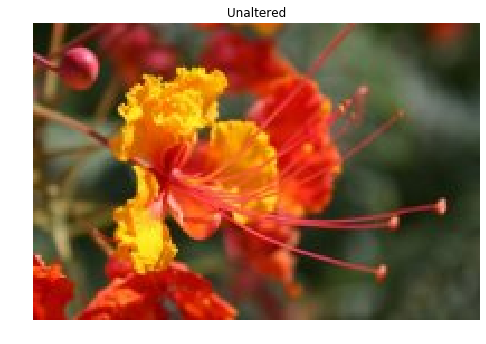

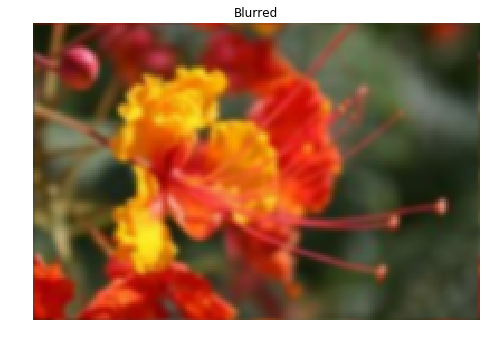

In [11]:
blurFilter = np.array([[1,4,6,4,1],
                     [4,16,24,16,4],
                     [6,24,36,24,6],
                     [4,16,24,16,4],
                      [1,4,6,4,1]])
blurFilter = np.divide(blurFilter,np.sum(blurFilter))
print("Filter:")
print(blurFilter)
img = image.imread('images/flower.png',(0,255))[:,:,:3]
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")   
plt.axis("tight")  
plt.axis("image")
plt.title("Unaltered")
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(filteredImage(img,blurFilter))
plt.axis("off")   
plt.axis("tight")  
plt.axis("image")  
plt.title("Blurred")
plt.show()

Filter:
[[0.2 0.  0.  0.  0. ]
 [0.  0.2 0.  0.  0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.  0.  0.2]]


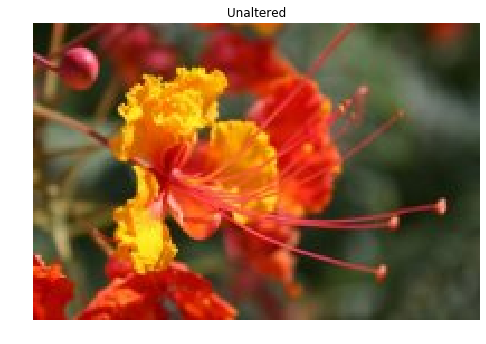

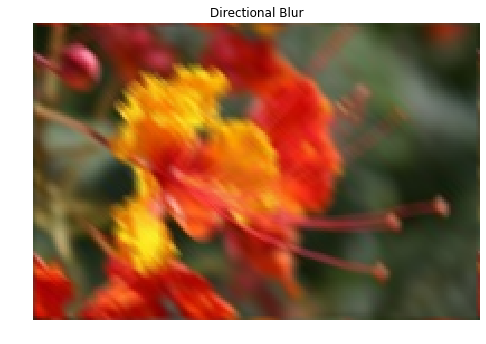

In [13]:
blurFilter = np.array([[1,0,0,0,0],
                     [0,1,0,0,0],
                     [0,0,1,0,0],
                     [0,0,0,1,0],
                      [0,0,0,0,1]])
blurFilter = np.divide(blurFilter,np.sum(blurFilter))
print("Filter:")
print(blurFilter)
img = image.imread('images/flower.png',(0,255))[:,:,:3]
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")   
plt.axis("tight")  
plt.axis("image")
plt.title("Unaltered")
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(filteredImage(img,blurFilter))
plt.axis("off")   
plt.axis("tight")  
plt.axis("image")  
plt.title("Directional Blur")
plt.show()

Filter:
[[-1 -1  0]
 [-1  0  1]
 [ 0  1  1]]


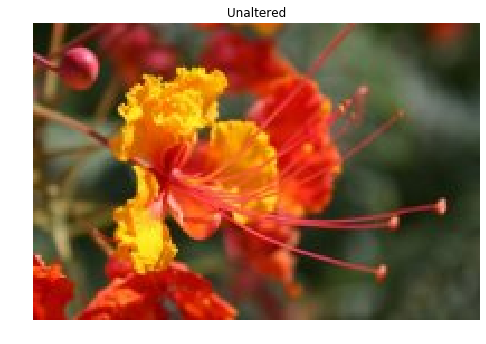

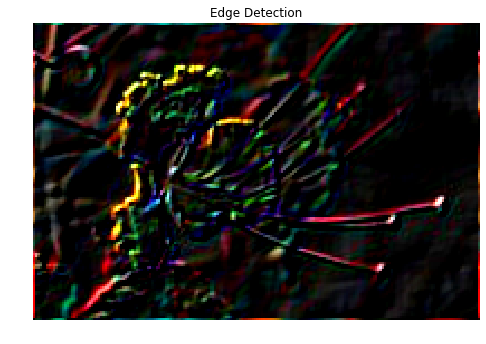

In [12]:
blurFilter = np.array([[-1,-1,0],
                      [-1,0,1],
                      [0,1,1]])
#blurFilter = np.divide(blurFilter,np.sum(blurFilter))
print("Filter:")
print(blurFilter)
#img = image.imread('images/photo3.png',(0,255))
img = image.imread('images/flower.png',(0,255))[:,:,:3]

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")   
plt.axis("tight")  
plt.axis("image")
plt.title("Unaltered")
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(filteredImage(img,blurFilter))
plt.axis("off")   
plt.axis("tight")  
plt.axis("image")  
plt.title("Edge Detection")
plt.show()